In [115]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster

In [131]:
def locatePattern(imagePath, templatePath= 'template.jpg'):

    image    = cv2.imread(imagePath   , cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(templatePath, cv2.IMREAD_GRAYSCALE)

    assert image    is not None, "image    file could not be read, check with os.path.exists()"
    assert template is not None, "template file could not be read, check with os.path.exists()"

    # help(cv22.matchTemplate)
    res = cv2.matchTemplate(image,template,cv2.TM_CCOEFF)
    res = np.dstack(np.unravel_index(np.flip(res.ravel().argsort()), res.shape))
    res = res[0,:1000] + np.array(template.shape) / 2
    res = cluster.KMeans(n_clusters= 8).fit(res).cluster_centers_.astype(int)

    return res

def drawCrosses(imagePath,cordinates):
    image = cv2.imread(imagePath   , cv2.IMREAD_GRAYSCALE)
    assert image is not None, "image    file could not be read, check with os.path.exists()"

    for i,j in cordinates:
        image[i,j-10:j+10] = 0
        image[i-10:i+10,j] = 0

    plt.figure(figsize= [20,15])
    plt.imshow(image, cmap= 'gray')

In [132]:
imagePath    = 'Test Photos/Test Photos/Phototaking/39.jpg'
templatePath = 'template.jpg'

In [133]:
cordinates = locatePattern(imagePath= imagePath)
cordinates

c:\Users\hahme\miniconda3\envs\shakoor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[586, 262],
       [506,  92],
       [572, 144],
       [454, 147],
       [516, 205],
       [513,  85],
       [450, 156],
       [580, 138]])

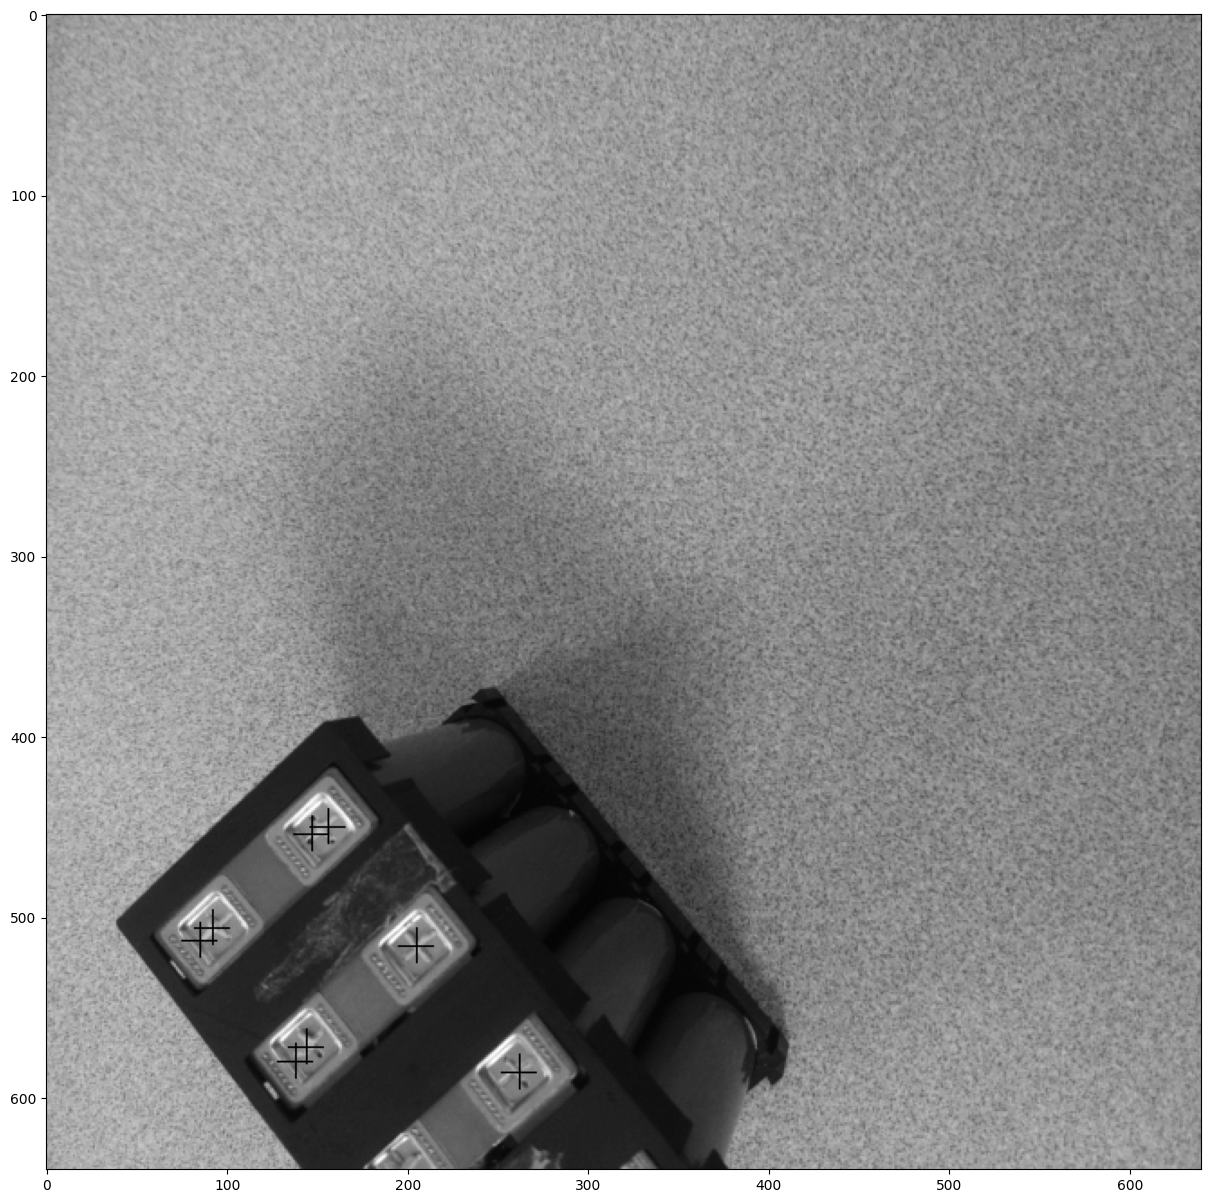

In [134]:
drawCrosses(imagePath= imagePath, cordinates= cordinates)